# Iris - Logistic Regression
This example applies Logistic Regression in order to predict the type of iris plant based on sepal and petal length and width.

[Click here if you want to understand more about How Logistic Regression works](https://hackernoon.com/introduction-to-machine-learning-algorithms-logistic-regression-cbdd82d81a36)

## Load the database and split data into train and test sets
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:
- Iris-Setosa
- Iris-Versicolour
- Iris-Virginica

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [2]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
import numpy as np
np.unique(y)

array([0, 1, 2])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='lbfgs', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


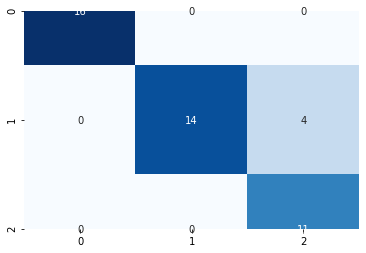

In [6]:
import seaborn as sns
sns.heatmap(conf, cbar=False, annot=True, cmap="Blues")

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



## Create Logistic Regression models for different configurations of multi_class and solver

- **multinomial** logit generalizes logistic regression to multiclass problems
- **ovr** One-vs-Rest strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives

- **lbfgs and sag** are mathematical and computacional approaches to use in the optimization problem

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

for mc in ('multinomial', 'ovr'):
    for solver in ('sag', 'lbfgs'):
        model = LogisticRegression(verbose=1, solver=solver, multi_class=mc)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print ('multiclass: ' + mc)
        print ('solver: ' + solver)
        print(confusion_matrix(y_test, y_pred)) 
        print(classification_report(y_test,y_pred))

max_iter reached after 0 seconds
multiclass: multinomial
solver: sag
[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

multiclass: multinomial
solver: lbfgs
[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

max_iter reached after 0 seconds
max_iter reached after 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds
multiclass: ovr
solver: sag
[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45

multiclass: ovr
solver: lbfgs
[[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.78      0.88        18
           2       0.73      1.00      0.85        11

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
